# Ingilterede satilan Mercedes-Benz araba modeli icin merc.xlsx veri setimizi analiz edip yeni veriler icin bir tahminleme modeli yapalim.

### Gerkeli libraries ekleyelim;

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### Veri setimizi getirelim;

In [3]:
df = pd.read_excel('merc.xlsx')

In [4]:
df.head(10)

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
6,2018,30948,Automatic,16000,145,47.9,2.1
7,2012,10948,Automatic,107000,265,36.7,3.5
8,2019,139948,Automatic,12000,145,21.4,4.0
9,2017,19750,Automatic,15258,30,64.2,2.1


### Verilerimiz hakkinda biraz bilgi sahibi olalim;

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


### Verilerimiz icinde null olan degerler var mı ona bakalim;

In [6]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 504x360 with 0 Axes>

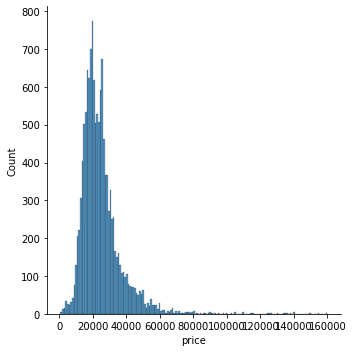

In [7]:
plt.figure(figsize=(7, 5))
sns.displot(df['price'])

Graikte de goruldugu gibi ana dagilim 20-30k price arasindadir. 160k'ya kadar olan araba sayisi genel araba sayisina oranla fazlaca az gibi gorunuyor. Bu da bizim ortalama araba fiyatlarimizi arttirabilir. Saglikli tahminler etmemizi bu veriler zorlastirabilir.

### Hangi yilda ne kadar araba var onu gorelim;

<AxesSubplot:xlabel='year', ylabel='count'>

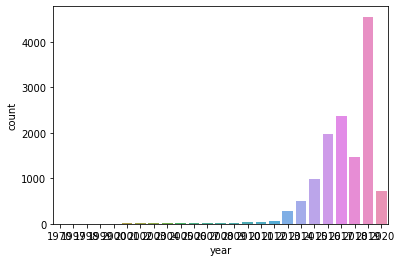

In [8]:
sns.countplot(x='year', data=df) # df'mizde gruplamak istedigimiz column ve df ismimiz

### Verilerimizin birbirleri arasindaki Korelasyona(iliskisine) bakalim;

Korelasyon: 2 veri arasinda ki dogrusal iliskinin yonunu ve gucunu gosterir. Degerin buyuk olmasi o degeri ne kadar etkiledigi anlamina gelmektedir. 

In [9]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


#### Sadece price sutununa gore korelasyon;

In [10]:
df.corr()['price'].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

'year' verileri price verilerini en fazla etkileyen etken! year, engineSize, tax verileri price degerini arttirirken,
mpg ve mileage degerleri price degerini azalir.

### Farkli bir grafiksel tabloda verilerimizin dagilimina tekrar bakalim;

<AxesSubplot:xlabel='year', ylabel='price'>

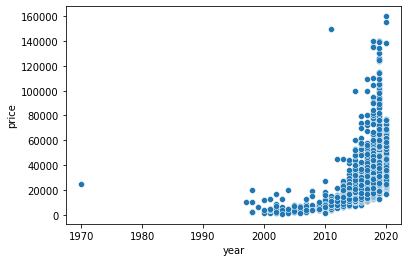

In [11]:
sns.scatterplot(x='year', y='price', data=df) # x -> featur / y -> output

### Verilerimiz icindeki fiyatlandirmalara bir bakalim;

In [12]:
df.sort_values('price', ascending=False).head(20) # fiyatlara gore azalan ilk 20 veriyi getirdik

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


#### Genel dagilima gore price degeri fazla olan arabalari veri setimizden cikaralim

Veri setimizin %99'u nu almak veri setimizi bozmayabilir.
Bu veri setimizde 13k old. %1'i 130 civarina gelmektedir. O %1'lik kismida en yuksek fiyatli arabalardan cikarirsak nasil bir tablo olusur gorelim;

In [13]:
len(df) # toplam data

13119

In [14]:
len(df) * 0.01 # %1'i

131.19

### Verilerimizden en yuksek price'a sahip %1'lik kismi cikaralim;

In [15]:
yuzdeDoksanDokuzlukDf = df.sort_values('price', ascending=False).iloc[131:] # %1'inden sonraki kisimlari bu sekilde almis olduk

In [16]:
yuzdeDoksanDokuzlukDf

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


### %100'luk veri seti ile %99'luk veri setini karsilastiralim,

In [17]:
yuzdeDoksanDokuzlukDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [18]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


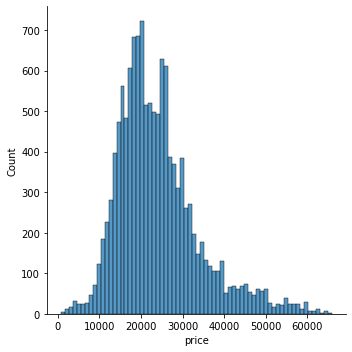

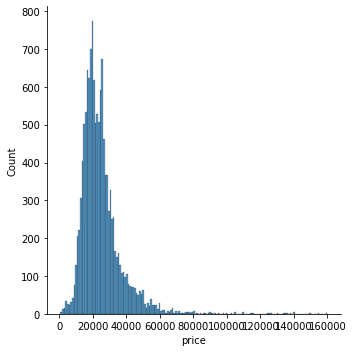

In [19]:
sns.displot(data=yuzdeDoksanDokuzlukDf['price']) # %99'luk
sns.displot(data=df['price']) # %100'luk

### Cok daha homojen bir grafik elde ettik

## Yillara gore satilan arac fiyatlarinin ortalamasini bulalim;

In [20]:
df.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

1970 model arac neredeyse 2018 model araclarla ayni fiyata satilmis. Bu veri suan ki tablomuza gore aykiri veri olarak kabul edelim. Bu veriyi cikarmak istersek;

In [21]:
df[df['year'] != 1970].groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

## Gerekli temizlemeyi yaptiktan sonra data setimizi son haline guncelleyelim;

In [22]:
df = yuzdeDoksanDokuzlukDf

In [23]:
df = df[df['year'] != 1970]

In [24]:
df.groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [25]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


### Veri Setimizi Regression'a sokmadan once transmission column'unu kaldiralim cunku transmission numeric bir deger olmadigindan hata verir!

In [26]:
df = df.drop('transmission', axis=1)

## Veri temizligimizi bitirdik artik Regression'a sokabiliriz;
### Verimizin son hali,

In [27]:
df.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


### X ve y(train ve test) verilerimizi olusturalim

In [28]:
y = df['price'].values

In [29]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [30]:
X = df.drop('price', axis=1).values

In [31]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [32]:
X

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

## test ve train olusturmamiz icin gerekli kutuphanemizi ekleyelim;

In [33]:
from sklearn.model_selection import train_test_split

%33'luk kisim test verimiz icin ayrilsin.  
Python bu bolme islemini yaparken surekli bizim verdigimiz random_state degerine gore bolme islemini yapar.  
Yani ayni test verileriyle test yapmis olur.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.33)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_test

array([[0.95652174, 0.01545566, 0.25      , 0.34508547, 0.24193548],
       [0.95652174, 0.0185715 , 0.25      , 0.30235043, 0.32258065],
       [0.95652174, 0.05469905, 0.25      , 0.26869658, 0.35483871],
       ...,
       [0.73913043, 0.05196545, 0.35344828, 0.2542735 , 0.48387097],
       [0.73913043, 0.18723238, 0.25862069, 0.2633547 , 0.25806452],
       [0.86956522, 0.08107753, 0.25      , 0.39102564, 0.24193548]])

In [40]:
X_train

array([[0.95652174, 0.05208514, 0.25      , 0.23771368, 0.20967742],
       [0.95652174, 0.05412376, 0.25      , 0.23771368, 0.20967742],
       [0.91304348, 0.10833246, 0.25      , 0.32211538, 0.33870968],
       ...,
       [0.86956522, 0.1263364 , 0.25      , 0.29594017, 0.33870968],
       [0.91304348, 0.04747895, 0.25      , 0.23771368, 0.24193548],
       [0.91304348, 0.0886876 , 0.25      , 0.37126068, 0.33870968]])

### X_train ve X_test degerlerimizi 0-1 arasina cektik

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()

# Perceptrons
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))

# Output
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

### Modelimizi egitelim;

In [45]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
35/35 [==============================] - 0s 5ms/step - loss: 676091008.0000 - val_loss: 678591616.0000
Epoch 2/300
35/35 [==============================] - 0s 2ms/step - loss: 676045760.0000 - val_loss: 678519872.0000
Epoch 3/300
35/35 [==============================] - 0s 2ms/step - loss: 675922880.0000 - val_loss: 678313408.0000
Epoch 4/300
35/35 [==============================] - 0s 2ms/step - loss: 675539520.0000 - val_loss: 677650944.0000
Epoch 5/300
35/35 [==============================] - 0s 2ms/step - loss: 674393472.0000 - val_loss: 675813440.0000
Epoch 6/300
35/35 [==============================] - 0s 2ms/step - loss: 671471296.0000 - val_loss: 671371136.0000
Epoch 7/300
35/35 [==============================] - 0s 2ms/step - loss: 664853952.0000 - val_loss: 661821504.0000
Epoch 8/300
35/35 [==============================] - 0s 2ms/step - loss: 651306112.0000 - val_loss: 643148672.0000
Epoch 9/300
35/35 [==============================] - 0s 2ms/step - loss: 6261790

35/35 [==============================] - 0s 2ms/step - loss: 60787552.0000 - val_loss: 58783372.0000
Epoch 73/300
35/35 [==============================] - 0s 2ms/step - loss: 60144000.0000 - val_loss: 58134404.0000
Epoch 74/300
35/35 [==============================] - 0s 2ms/step - loss: 59470412.0000 - val_loss: 57470912.0000
Epoch 75/300
35/35 [==============================] - 0s 2ms/step - loss: 58774624.0000 - val_loss: 56793032.0000
Epoch 76/300
35/35 [==============================] - 0s 2ms/step - loss: 58074452.0000 - val_loss: 56114676.0000
Epoch 77/300
35/35 [==============================] - 0s 2ms/step - loss: 57368624.0000 - val_loss: 55412412.0000
Epoch 78/300
35/35 [==============================] - 0s 2ms/step - loss: 56648816.0000 - val_loss: 54706284.0000
Epoch 79/300
35/35 [==============================] - 0s 2ms/step - loss: 55911816.0000 - val_loss: 53993720.0000
Epoch 80/300
35/35 [==============================] - 0s 2ms/step - loss: 55169804.0000 - val_loss: 5

35/35 [==============================] - 0s 2ms/step - loss: 23710718.0000 - val_loss: 21762140.0000
Epoch 144/300
35/35 [==============================] - 0s 2ms/step - loss: 23591470.0000 - val_loss: 21693294.0000
Epoch 145/300
35/35 [==============================] - 0s 2ms/step - loss: 23498260.0000 - val_loss: 21568334.0000
Epoch 146/300
35/35 [==============================] - 0s 2ms/step - loss: 23386808.0000 - val_loss: 21442444.0000
Epoch 147/300
35/35 [==============================] - 0s 2ms/step - loss: 23291824.0000 - val_loss: 21350334.0000
Epoch 148/300
35/35 [==============================] - 0s 2ms/step - loss: 23212636.0000 - val_loss: 21271070.0000
Epoch 149/300
35/35 [==============================] - 0s 2ms/step - loss: 23151328.0000 - val_loss: 21189038.0000
Epoch 150/300
35/35 [==============================] - 0s 2ms/step - loss: 23043248.0000 - val_loss: 21112814.0000
Epoch 151/300
35/35 [==============================] - 0s 2ms/step - loss: 22987374.0000 - val

35/35 [==============================] - 0s 2ms/step - loss: 20570814.0000 - val_loss: 18935166.0000
Epoch 215/300
35/35 [==============================] - 0s 2ms/step - loss: 20560996.0000 - val_loss: 18888046.0000
Epoch 216/300
35/35 [==============================] - 0s 2ms/step - loss: 20576230.0000 - val_loss: 18893356.0000
Epoch 217/300
35/35 [==============================] - 0s 2ms/step - loss: 20515196.0000 - val_loss: 18953944.0000
Epoch 218/300
35/35 [==============================] - 0s 2ms/step - loss: 20534192.0000 - val_loss: 18897526.0000
Epoch 219/300
35/35 [==============================] - 0s 2ms/step - loss: 20486674.0000 - val_loss: 18823536.0000
Epoch 220/300
35/35 [==============================] - 0s 2ms/step - loss: 20476568.0000 - val_loss: 18810106.0000
Epoch 221/300
35/35 [==============================] - 0s 2ms/step - loss: 20462988.0000 - val_loss: 18800542.0000
Epoch 222/300
35/35 [==============================] - 0s 2ms/step - loss: 20423406.0000 - val

35/35 [==============================] - 0s 2ms/step - loss: 19680518.0000 - val_loss: 18122770.0000
Epoch 286/300
35/35 [==============================] - 0s 2ms/step - loss: 19668904.0000 - val_loss: 18125666.0000
Epoch 287/300
35/35 [==============================] - 0s 2ms/step - loss: 19646458.0000 - val_loss: 18163870.0000
Epoch 288/300
35/35 [==============================] - 0s 2ms/step - loss: 19666840.0000 - val_loss: 18160880.0000
Epoch 289/300
35/35 [==============================] - 0s 2ms/step - loss: 19646908.0000 - val_loss: 18163090.0000
Epoch 290/300
35/35 [==============================] - 0s 2ms/step - loss: 19638498.0000 - val_loss: 18177564.0000
Epoch 291/300
35/35 [==============================] - 0s 2ms/step - loss: 19634412.0000 - val_loss: 18190232.0000
Epoch 292/300
35/35 [==============================] - 0s 2ms/step - loss: 19664778.0000 - val_loss: 18128672.0000
Epoch 293/300
35/35 [==============================] - 0s 2ms/step - loss: 19609500.0000 - val

In [46]:
lossData = pd.DataFrame(data=model.history.history)

In [47]:
lossData.head()

,loss,val_loss
0,676091008.0,678591616.0
1,676045760.0,678519872.0
2,675922880.0,678313408.0
3,675539520.0,677650944.0
4,674393472.0,675813440.0


<AxesSubplot:>

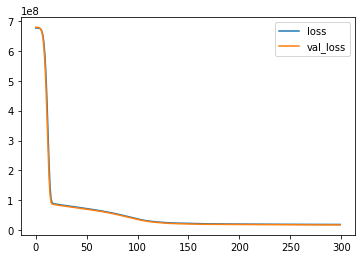

In [48]:
lossData.plot()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
predictArrays = model.predict(X_test)

134/134 [==============================] - 0s 669us/step


In [51]:
mean_absolute_error(y_test, predictArrays)

3072.396193183475

In [52]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


### Ortalama fiyatimizdan %13'luk gibi bir sapma gozlemleyebiliriz!

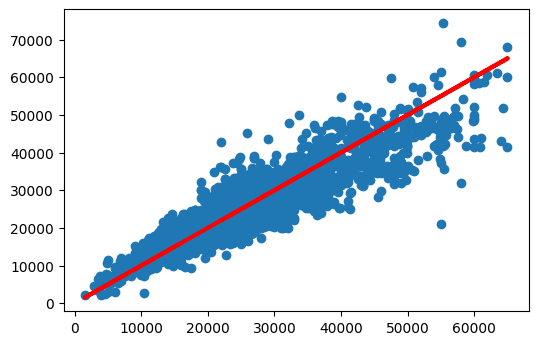

In [53]:
plt.figure(dpi=100)
plt.scatter(y_test, predictArrays)
plt.plot(y_test, y_test, 'r', linewidth=3)

### Data Frame'den bir veri cikartip tahmin etmesi icin geri verelim;

In [54]:
df.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [55]:
newCarSeries = df.drop('price', axis=1).iloc[2]

In [56]:
newCarSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

### araba features'lerini modelimize verelim;

In [57]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1, 5))

In [58]:
newCarSeries

array([[1.        , 0.01543635, 0.25      , 0.14369658, 0.64516129]])

### Yeni arabamiza verdigi deger;

In [59]:
model.predict(newCarSeries)

1/1 [==============================] - 0s 13ms/step


array([[62035.76]], dtype=float32)